# Week 5: Data Visualization

## On Practice in Python

In today's lecture, there will be a lot of Python coding. 
You can access a file (script) with extracted parts of the code so be sure to try running the script yourself.
The explanation part is in Japanese, but only the code part is required.

Copy to your own GoogleDrive before use. Just go to File in the menu and choose Copy to Drive.

https://colab.research.google.com/drive/15-vdNSXSG_S0XlExxCCD9Be1w1fQ3S5Q?usp=sharing#scrollTo=f42fukrkA449


In the latter half of the class, group work is scheduled. We plan to divide the students into small groups and have each group work on a given problem from a data science perspective. Therefore, it is expected that everyone will be able to operate Python to some degree.

It is not easy to master a programming language in a short period of time, but we hope that you will repeat self-study on your own while watching the following videos and others.

<iframe width="560" height="315" src="https://www.youtube.com/embed/e60ItwlZTKM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


## 　What is data visualization?

Mean value is not the only indicator to know the characteristics of data. In the previous chapter, median and mode were introduced. It was also pointed out that it is important to consider data in terms of distribution. To consider distribution, it is useful to represent data graphically (visualize).

In the previous chapter, I mentioned that in data science, probability distributions are assumed when considering data. For example, we showed that the distribution of the number of meetings can be considered by applying the Poisson distribution.

However, in real data, there are cases where extremely large or small values are mixed in. Such values are called **outliers**, and summarizing data by mean, median, or variance (standard deviation) without noticing the existence of such anomalous data may produce incorrect analysis results. This can lead to erroneous analysis results. One effective way to find outliers is through visualization. Before starting to analyze data, it is very important to capture the characteristics of the data through visualization. Therefore, here we will explain visualization, which is often used in data science. If you have installed Python using a method other than Anaconda, you should install additional tools for visualization.

`pip3 install matplotlib seaborn`.

## Displaying Graphs

When examining data from a data science perspective, it is rare that one does not know anything about the distribution of the data; in fact, one may have some prior knowledge of the data. For example, we know that it is effective to analyze the body length of an organism or the size of a component in an industrial product by fitting a normal distribution.

Alternatively, if the probability distribution of the data cannot be determined, the latter is often used, assuming data that are very similar.

For example, suppose there is a promenade in front of a school building located at the back of a local university campus. Suppose that there is a data set that observes the number of faculty, staff, and students passing along the promenade on weekends and holidays (in this case, **dataset** means that there are multiple observations, such as two passersby on one day, three on another day, etc.).

Load the data in Jupyter notebook (for those who use another tool, use that one).

In [1]:
import pandas as pd
df = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/public/x.csv")

The above instruction reads a CSV file stored on this class site directly over the Internet (thus requiring an Internet connection). Here we have named the dataset `df`. Let's check it out.

In [2]:
df

,x
0,1
1,3
2,2
3,4
4,4
...,...
95,1
96,3
97,0
98,2


In the `df` data, you will see that there is a column named `x`. Keep in mind that we will be working with this `x` column from now on.

Each line of data corresponds to the number of passersby observed on a given day, which is 100 days. In Python, it is called "index. In Python, it is called "index." Note that the index starts from 0 (zero-based). In the case of this data, the last row is the 99th data, but it is actually the 100th data (two passers-by were observed). The `[100 rows x 1 columns]` at the end of the output indicates that this data is a data frame with 100 rows and 1 column. Now, let us create a frequency table. In this case, it means to create a head like the following.

<center>

| Number of people in observation | Date |
|----------|------|
| 0  | Day 〇 |
| 1  | Day 〇 |
| 2  | Day 〇 |
</center>

**pandas** is a package with all the necessary tools for data science, and there are many tools (functions) to create such a frequency table. In this case, applying `value_counts()` to the `x` column of a `df` object will tally the number of days on which a certain number of people are observed.

In [3]:
df['x'].value_counts()

2    29
1    26
3    17
0    13
4    10
5     3
6     2
Name: x, dtype: int64

In the output, the number of days observed is listed in descending order. However, is it possible that the expected output format is actually the number of people in ascending ascending order? If so, add a function to the above code to sort the data in the order of the index.

In [4]:
df['x'].value_counts().sort_index()

0    13
1    26
2    29
3    17
4    10
5     3
6     2
Name: x, dtype: int64

The leftmost 0 in this output indicates that there were 13 days (out of 100) when no one was observed on the boardwalk. The frequency table shows that the number of passersby observed per day is small. For count data with a small number of occurrences (i.e., a small number of observations), it is generally appropriate to assume a Poisson distribution, but we would like to confirm whether this is appropriate or not. One way to check the shape of the data in such a case is to represent the data as a bar chart, which can be visualized using **matplotlib**, a Python graphing tool, and **seaborn**, an extension of **matplotlib**.


If you are using Jupyter, you should also execute the following one line before creating the graph.

```
    %matplotlib inline
```

Note that the `plt.show()` at the end of the following code is a necessary instruction if you are using a tool other than Jupyter notebook. Remove the # at the beginning of the line and execute it.

<Axes: xlabel='x', ylabel='count'>

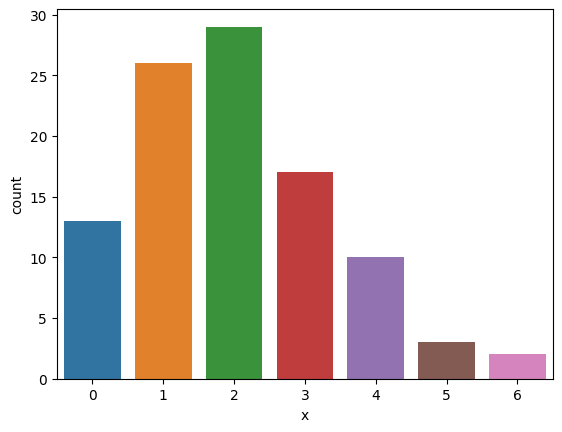

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='x', data=df)
# If you are using a tool other than jupyter, run below to draw the image.
# plt.show()

Now, let us proceed to check whether it is appropriate to fit a Poisson distribution to this data. First, we find the mean of the data.

In [6]:
df.mean()

x    2.02
dtype: float64

Since the mean of the sample is approximately 2, let us assume that the expected value (parameter) of the Poisson distribution we assume is also 2.0. Then, it is possible to determine the probability of observing between 0 and 6 passersby during 100 days.

In [7]:
import numpy as np
times = np.array(range(0,7,1))
from scipy.stats import poisson
x2 = [poisson.pmf(i, 2.0)  for i in times]
X2 = pd.Series(x2)
X2

0    0.135335
1    0.270671
2    0.270671
3    0.180447
4    0.090224
5    0.036089
6    0.012030
dtype: float64

`poisson.pmf(i, 2.0)` is the instruction to find the probability that an integer between 0 and 6 appears in the Poisson distribution with the expected value of 2.0 (we used this instruction in the previous and 4th lecture). The result is stored as `X2`, so let's superimpose it on the bar plot shown earlier. The following code uses a trick to superimpose the two plots, but it is not necessary to understand this trick (`twinx()`) here. For now, the purpose of the present discussion is to use the graph to determine whether it is appropriate to fit a Poisson distribution to the data or not. Note that the `plt.show()` at the end of the following code is a necessary instruction if you are using a tool other than Jupyter notebook.

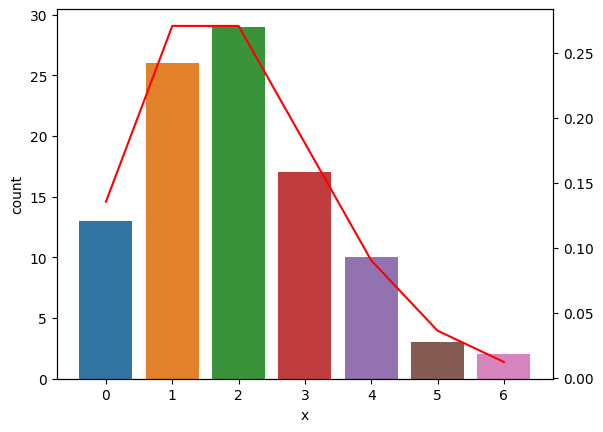

In [8]:
fig, ax1 = plt.subplots()
sns.countplot(x='x', ax=ax1, data=df)
ax2 = ax1.twinx()
ax2.plot(X2,'r-')
# plt.show()

Here the red line segment is the probability (the Y axis on the right side corresponds to the probability). Although the probability of the day when only one person was observed on the boardwalk (the vertical axis on the right is the probability) seems to be a little smaller than the Poisson distribution with parameter 2.0, or expected value of 2.0, it can be judged that it generally follows the Poisson distribution. However, if you do not trust the graph based on its appearance, you can use a method called **statistical test**, which will be explained in next week's lecture, to determine whether the actual observed value and the theoretical value are close or not. Using a statistical test, it is possible to make a judgment based on numerical values (specifically, probability), rather than on the impression of a graph.

### Boxplot

For example, suppose we have data on the height of about 100 third grade boys in a certain high school. （The mean height of a third grade male high school student in Japan is about 170 cm. This can be confirmed from the "Annual Report of School Health Statistics Research" by the Ministry of Education, Culture, Sports, Science and Technology (MEXT). As an aside, these government statistics are available to anyone through a portal called e-stat (https://www.e-stat.go.jp/). A search for "Annual Report of School Health Statistics Research" on the site will bring up a list of past data. See "Mean and standard deviation of height and weight by age by city class by establishment" in the 2008 national edition.

Here, let's load the sample data prepared for the class.

In [4]:
heights = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/public/heights.csv")
heights

,x
0,166.8
1,168.7
2,179.0
3,170.4
4,170.7
...,...
95,108.0
96,107.0
97,109.0
98,106.0


Now, the data from this high school gave an mean of about 164 centimeters.

In [5]:
heights.mean()

x    164.297
dtype: float64

The national mean is 170 centimeters, which seems quite low. Is there some health problem among the boys in this high school? First, let's check the distribution of the data. In this case, we often use a **boxplot** graph.

<Axes: ylabel='x'>

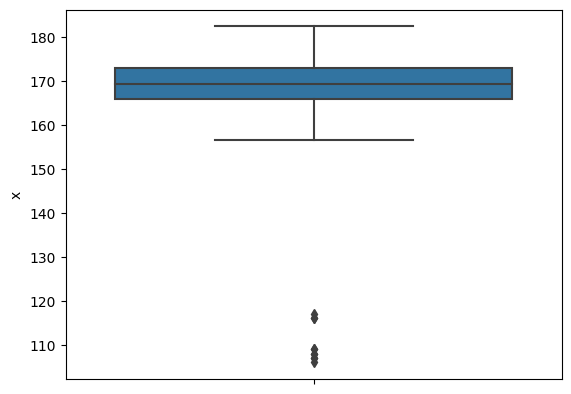

In [11]:
sns.boxplot(y='x', data=heights, orient='v')

The graph may be a little confusing. First of all, the Y-axis is the range of height, which should not be a problem.
There is a dark blue box at the top. This is the box of boxplot. A rather thick line is drawn in the center of the box, which is the median.

In [12]:
heights.median()

x    169.35
dtype: float64

The median is higher than the mean, about 169 cm. Let's see how it corresponds to the memory on the horizontal axis. Next, the top and bottom of the box (lid and bottom) correspond to the 1st quartile, and the lid of the box corresponds to the 3rd quartile. **1st quartile** corresponds to the 1/4th (25%) of the data from the smallest quartile when the data are sorted by size, while **3rd quartile** is the 3/4th (75%) of the data from the largest quartile. Incidentally, the median can also be said to be the **second quartile**. The range from the first quartile to the third quartile is also called the **interquartile range**. When the function `quantile()` is executed with the numbers corresponding to the quartiles, each of them is obtained.

In [13]:
heights.quantile([0, 0.25, 0.5, 0.75, 1.0])

,x
0.00,106.000
0.25,165.975
0.50,169.350
0.75,172.975
1.00,182.500


However, several different methods have been proposed for calculating quartiles, with slightly different outputs depending on the software. Even Python and R, two of the leading tools in the data science field, produce slightly different outputs, but for details, please refer to [external site: Wikipedia: Quartiles](https://ja.wikipedia.org/wiki/%E5%88%86%E4%BD%8D%E6%95%B0), etc. ( This will not be included in the quiz).

Next, the line extending from the lid or bottom of the box is called whiskers.
Several calculations have been proposed for the length of the whiskers, but a typical method is shown below.

1. the top edge of the whiskers is the top of the box + 1.5 * the maximum value within the quartile range
2. the bottom edge of the whiskers is the bottom of the box - the minimum value within the 1.5 * IQR range

Let's do the calculations.

In [14]:
(172.975 + ( 172.975 - 165.975) * 1.5, 165.975 - ( 172.975 - 165.975) * 1.5)

(183.475, 155.475)

Any data outside of this up-and-down whisker is then considered an **outlier**. In this case, any measurement higher than about 184 cm or lower than 156 cm is considered an outlier. In this data, the maximum value is 182.5, so there are no outliers on the upper side (the taller side).

Let's add a few options to the code to create a boxplot, superimposing the individual height values as dots.

<Axes: ylabel='x'>

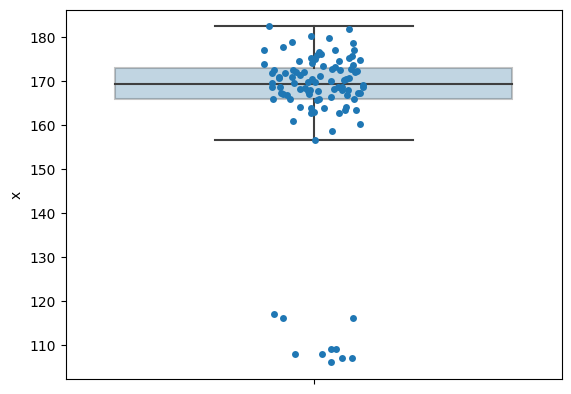

In [16]:
sns.stripplot(y="x", orient='v',  data=heights, jitter=True, edgecolor='gray')
sns.boxplot(y="x", orient='v', data=heights, boxprops=dict(alpha=.3), showfliers=False)

The points are scattered on either side of the X-axis to avoid overlapping points that represent nearly the same height. The X-axis has no meaning in this boxplot. We can see about 8 outliers, all of which are shorter than 120 cm in height. These would most likely have been entered incorrectly when recording. Because of these eight outliers, the avarage height of the boys in this high school may have been estimated lower. Let's exclude these eight outliers and try to find the mean.

In [17]:
heights[heights.x > 120].mean()

x    170.296667
dtype: float64

Excluding the values assumed to be outliers, the mean value was again determined to be the same as the Japanese national average.

### Outliers and missing values

Data often contain missing values as well as outliers. **Missing values** refers to the state in which an observation is not recorded for some reason. They are often recorded as blank, NA, or 99999 in the data set.

How to handle missing values and outliers is a difficult problem. The simplest approach is to remove the missing observations from the data, but this is not without its problems. First, the number of data may become so small that it may be questionable whether the data are representative of the target (population) of the analysis. Furthermore, if the missing values occur systematically (not by chance, but for some reason), the results of the analysis may be erroneous.

For example, suppose a medical test is performed on the blood pressure of research subjects over a period of six months. In the case of such data, the later the time, the more missing values there will be. This is because some of the subjects will not show up for the examination. Such subjects are often either perfectly healthy or, conversely, in such poor physical condition that they cannot go out. In other words, missing values are concentrated in certain subjects. In such cases, medically useful judgments would not be possible from an analysis obtained from data in which missing values are simply removed.

A method of compensating for missing values with other values has also been proposed. This is called interpolation. Although it is common to assign an average value as an interpolation, it is not a statistically appropriate process. How to handle missing values has been studied in the field of data science, but is omitted from this lecture.

The simplest way to handle outliers is to delete them, but this is not always appropriate. If there is a value of 107 cm in the height data of the high school student mentioned earlier, it may be no problem to delete it as a recording error. However, if a value of 75 (i.e., two and a half standard deviations away from the mean) was reported as a deviation value (see Week 4 lecture), a third party would not be able to determine whether the value was 57 or really 75. Although the details are omitted from this book, a probability distribution that sometimes produces large outliers is the Cauchy distribution, which is useful in data analysis involving outliers (it is often used in Bayesian analysis in particular).

### Comparison between levels

**Level** refers to the breakdown of a categorical variable. For a categorical variable that expresses "gender," there are generally three possible levels: "female," "male," and "neither. In some cases, we may want to check the differences or characteristics of each level in the categorical variable. For example, it may be possible to compare annual income by gender and confirm the current situation, such as women's income being unfairly low. Incidentally, to separate the levels of categorical variables is called **stratified**.

Let's consider an actual example. Consider the different effects of different feeds on the growth (weight) of chickens.

In [18]:
chickwts = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/public/chickwts.csv")
chickwts

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
...,...,...
66,359,casein
67,216,casein
68,222,casein
69,283,casein


Here, "feed" is the category variable, and its breakdown (six types such as "sunflower seeds" and "horsebean") is the level.

Let's create separate boxplots for each type of food (level).

<Axes: xlabel='feed', ylabel='weight'>

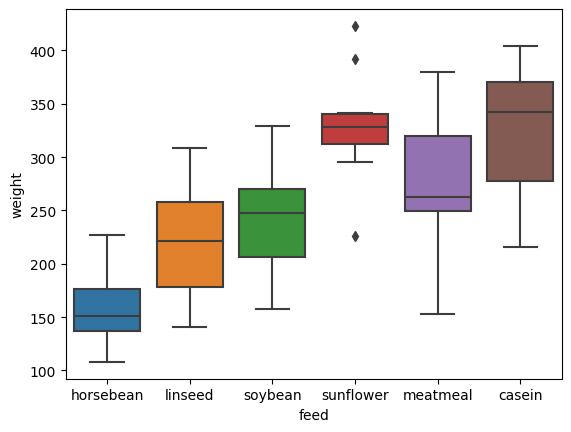

In [19]:
sns.boxplot(x='feed', y='weight', orient='v',data = chickwts)

The vertical axis is body weight, and the horizontal line inside each box represents the median. It can be seen that there is a considerable difference in body weight between chickens fed with dry casein and sunflower seeds (sunflower) and those fed with horse beans. We can also confirm that there are many outliers in the body weights of chickens fed sunflower seeds. In any case, it can be seen from the boxplots that **differences in chicken growth appear** depending on the type of feed.

If the intervention (in this case, changing the type of feed) is performed and other conditions (environment and environment such as the size of the poultry house and keeper's house) are the same, it would be reasonable to assume that the difference in average values at different levels of feed is due to the type of feed.

## Histogram

We introduced boxplot as a graph to check the distribution of data, but another commonly used graph is the **histogram**. Let's create a histogram from the height data. Note that `kde=False` is specified as an option, but let's see what kind of graph will be created if you remove this option (this does not mean that it will be included in the quiz). `kde` is an option for drawing density approximation functions and stands for kernel density estimate.

<Axes: ylabel='Count'>

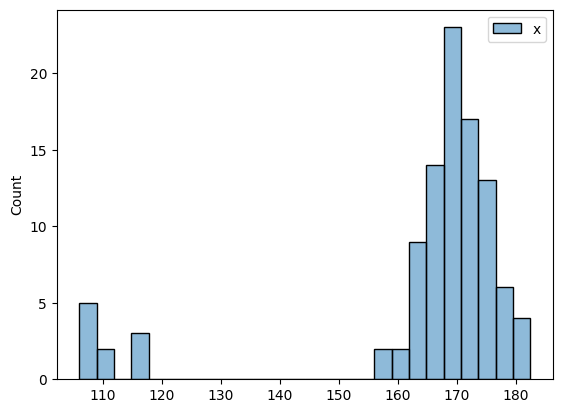

In [22]:
sns.histplot(heights,kde=False)
# plt.show()

The height of the bar shown represents the number of data contained in a given range. For example, there would be two students in the range around 160 cm tall.

At first glance, it looks like a so-called bar chart, but in a histogram, the bar sequence is meaningful. In this example, the left end of the horizontal axis (X-axis) is 100 cm and the right end is 190 cm. In other words, the values on the X-axis are continuous.

The difference from a histogram is that in a bar chart, the horizontal axis is the level of categorical variables such as "female" and "male," "other," or "agree" and "disagree. Hence, there is no inconvenience in checking the data if the order of " Female", "Male", and "Other" is interchanged.

<Axes: xlabel='Sex', ylabel='Value'>

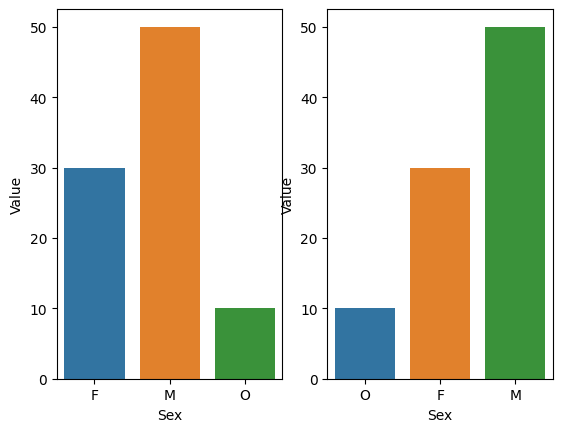

In [25]:
x1 = pd.DataFrame({'Value':[30,50,10], 'Sex':['F','M','O']})
x2 = x1.sort_values(by='Value')
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x='Sex', y='Value', data =x1, ax=ax1)
sns.barplot(x='Sex', y='Value', data =x2, ax=ax2)
# plt.show()

In the histogram, the width of each bar corresponds to an interval or range. To check the intervals in this graph, you can execute the following code.

[106.0,
 108.94230769230771,
 111.88461538461539,
 114.8269230769231,
 117.76923076923077,
 120.71153846153848,
 123.65384615384616,
 126.59615384615383,
 129.53846153846155,
 132.48076923076923,
 135.42307692307693,
 138.36538461538458,
 141.30769230769232,
 144.25,
 147.19230769230768,
 150.13461538461536,
 153.0769230769231,
 156.01923076923077,
 158.96153846153845,
 161.90384615384613,
 164.84615384615387,
 167.78846153846155,
 170.73076923076923,
 173.67307692307693,
 176.61538461538458,
 179.55769230769232]

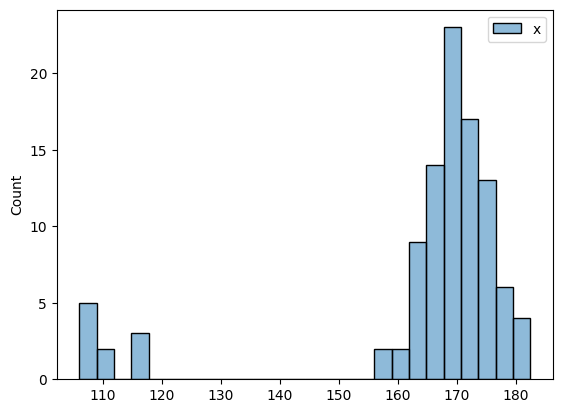

In [26]:
[h.get_x() for h in sns.histplot(heights,kde=False).patches]

The intervals are 106.0, 108.94, 111.88, and so on, starting from the left end. This interval is also expressed as **bin**.

We can also check how many students are in each interval as follows.

[5,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 9,
 14,
 23,
 17,
 13,
 6,
 4]

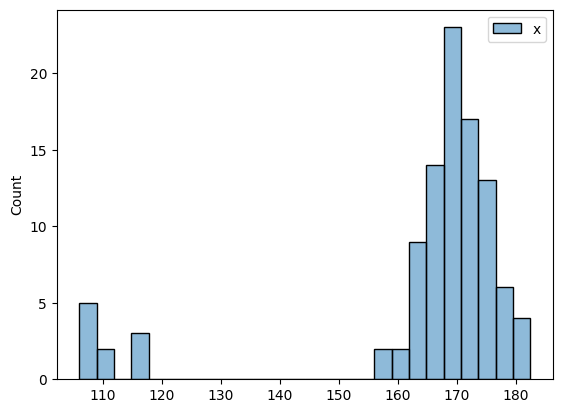

In [27]:
[h.get_height() for h in sns.histplot(heights,kde=False).patches]

The interval 106.0, 108.94 on the left belongs to 5 students.

There are several outliers in the height data that appear to be due to misstatements, so the bars are densely spaced apart on both sides; there are 8 students recorded as 120 centimeters or less.

As you can immediately imagine, the histogram will look completely different depending on the bin settings.
Let's try to create a histogram with wide bins.

<Axes: ylabel='Count'>

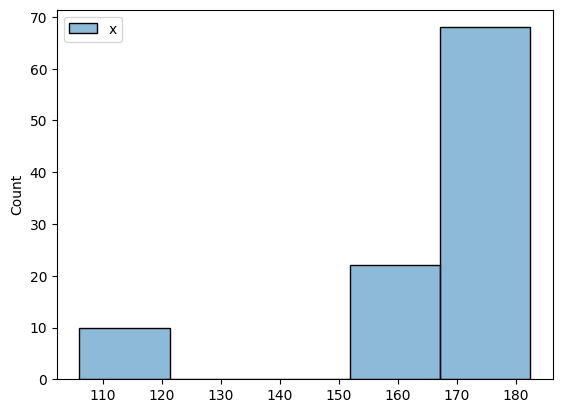

In [28]:
sns.histplot(heights, kde=False, bins=5)

As a result of the extreme reduction in the number of bins, the graphs look very different. Several methods have been proposed to set the optimal bins (e.g., Sturges' method, but Freedman-Diaconis' method is used in **seaborn**), but it is inevitable that the histograms will be arbitrary.

Let's use histograms to compare between levels. Earlier we saw the effect of chicken weight gain and feed on a boxplot. Let's use a histogram here. Note that we use `map()`, a function that performs iterative processing, but it is not necessary to understand the code (it will not be included in the quiz).

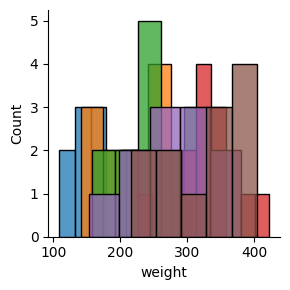

In [29]:
g = sns.FacetGrid(chickwts, hue="feed")
g.map(sns.histplot, 'weight', kde=False)

You can see that the distribution of each type of food is different, but it would be difficult to see the differences in the effects of the food because the bars have been overlaid.

## Scatter plot

Boxplots, histograms, and bar plots are primarily tools for visualizing a single variable. In data analysis, we sometimes want to draw two variables at the same time and consider their relationship. **Scatter plot** is a visualization tool often used to examine the relationship between two variables.

Let us take as an Example the data on the performance of brakes of a car.

In [30]:
cars = pd.read_csv("https://infoart.ait231.tokushima-u.ac.jp/public/cars.csv")
cars

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


Let's show the relationship between the speed of the car and the stopping distance in a scatter plot. Note that the `plt.show()` at the end of the following code is not necessary if you are using Jupyter notebook.

<Axes: xlabel='speed', ylabel='dist'>

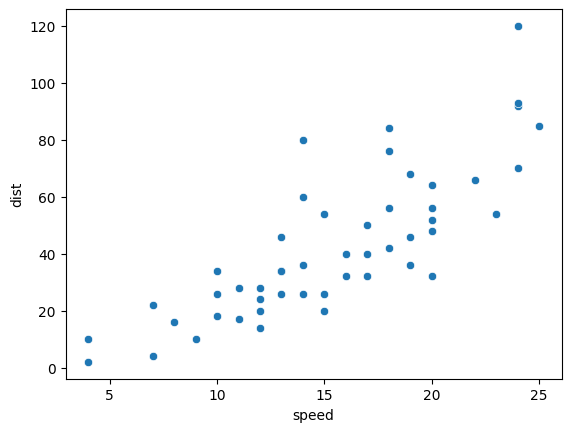

In [31]:
sns.scatterplot(data=cars,x='speed',y='dist')
# plt.show()

Each point on the graph corresponds to a passenger car, with the x-axis representing the speed (in miles) just before the brakes were applied as hard as possible, and the y-axis representing the distance (in feet) required to come to a stop. It can be seen that the points representing the car are generally aligned from lower left to upper right. The relationship between the two sets of data is called correlation in data science.

### Correlation

With the scatter plots, some relationship between vehicle speed and stopping distance was confirmed. This is expressed as **correlation**. The correlation is generally expressed by the following equation.


$$
r_{xy} = \frac{\displaystyle \frac{1}{n}\sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \frac{1}{n}\sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \frac{1}{n}\sum_{i = 1}^n 
(y_i - \overline{y})^2}}
$$

The $i$-th element $x_i$ of variable $x$ minus the mean value of $x$ ($\overline{x}$) is the **deviation** of $x$. The numerator is the sum of $x$ and $y$ multiplied by the deviation of the $i$th element, respectively. This is called **covariance**covariance. If the signs (plus or minus) of the deviations of $x$ and $y$ are identical, the covariance is positive. Conversely, if the signs of the deviations are different, the covariance is negative. When the signs do not match, for example, the consumption of hot food (hot pot dishes) decreases when the temperature is higher.

Since the magnitude of the covariance depends on the size of the data, the correlation coefficient is the value obtained by dividing the product of the standard deviations of the two variables. The correlation coefficient is a number between -1 and 1, regardless of the units of the original data. The closer the absolute value is to 1, the stronger the correlation between the two variables.

When there is a correlation between two variables, it is possible to use one to predict the other. If the temperature is high, we can predict that sales of hot pot dishes will be low. A method that has developed from this is **regression analysis** and is used not only in research but also in various businesses. Regression analysis will be explained in the next lecture.

### Correlation and Cause

Incidentally, even if a correlation is found between two variables, it does not necessarily mean that it is a cause. A **cause** is a situation where one is the cause of the other.

For example, if you examine the blood pressure of an employee at a company, you will find that it correlates with his/her annual income. This can be explained by considering a third variable, age. While blood pressure generally increases with age, under the seniority rule, annual income also increases with age. In other words, blood pressure and annual income are correlated, but this is not the cause. Such a correlation is called a **pseudo correlation**.

In order to establish (prove) a causal relationship, we need to conduct a randomized experiment, randomization experiment, or other planned research and analysis method (in the first lecture, we introduced that the 2018 Nobel Prize in Economics was awarded to results based on a randomized experiment).

### Anscombe's quartet

As an example of the importance of data visualization, let us present the Anscombe data. This data was artificially created by statistician Frank Anscombe, and is a well-known example where the actual distributions are quite different, even though the basic statistics are the same.

Anscombe's data is also included in the **seaborn** library, so let's load the data first.

In [33]:
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


The `dataset` column has levels I, II, III, and IV. In other words, there are four different datasets. Each dataset has two variables, `x` and `y`. First, let's check the mean and variance of each `x` and `y` for each dataset.

In [34]:
anscombe.groupby('dataset').agg(['mean','var'])

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

This code makes use of the somewhat advanced features of the **pandas** library. To explain in words, the data is first divided by column level with `groupby()`. In this data, there are four levels, I, II, III, and IV, so `anscombe` is divided into four groups. The mean and variance of each variable `x` and `y` in each group are calculated, and the function `agg()` can be used to calculate the mean and variance of two variables in each of the four groups at once.

[External site: Qiita: How to use groupby in Pandas](https://qiita.com/propella/items/a9a32b878c77222630ae)

From the output, we can see that the means and variances of the data sets are nearly identical. However, if we draw a scatter plot of each data set, we will notice that the distributions are quite different.

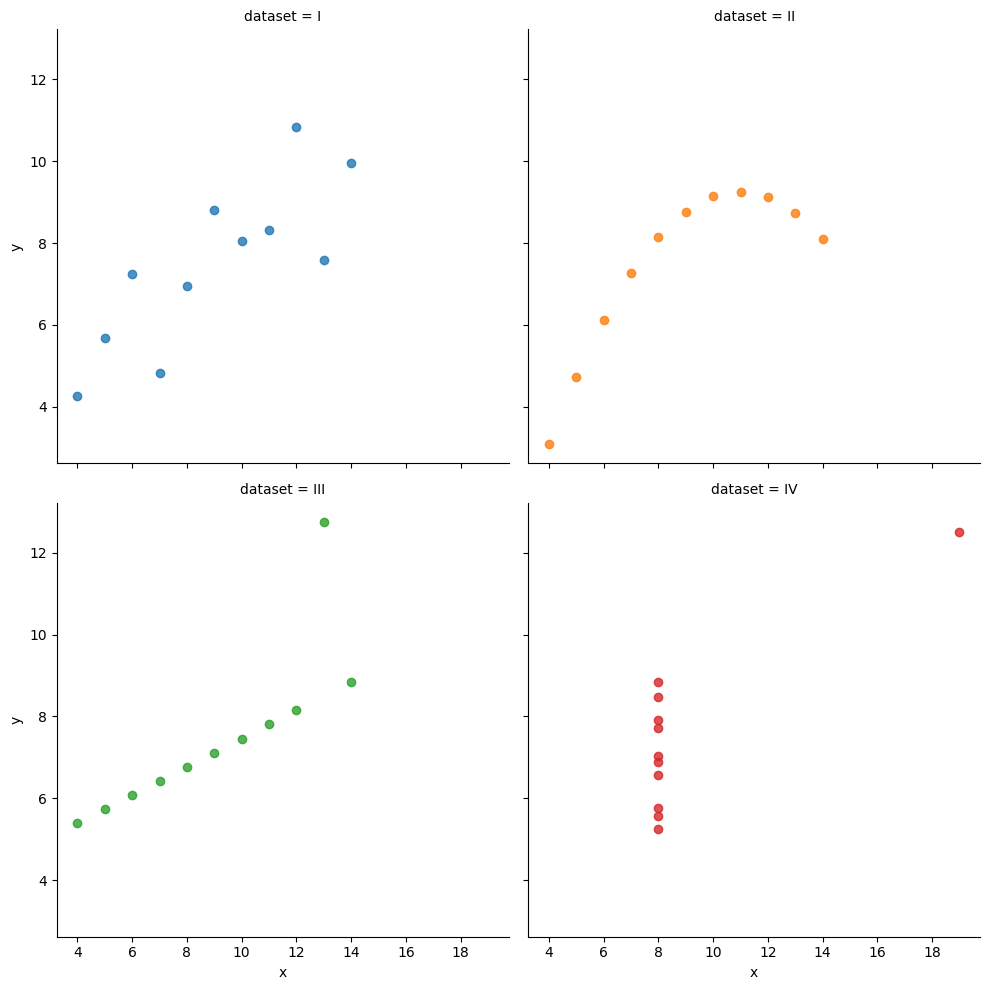

In [35]:
sns.lmplot(x="x", y="y", data=anscombe, fit_reg=False, hue="dataset", col="dataset", col_wrap=2)

The `lmplot()` also adds a regression line to the scatterplot. The regression line will be discussed in the lecture in week 7.

## Python and Graphs

[Intro to pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)

[An introduction to seaborn](https://seaborn.pydata.org/introduction.html)

<iframe width="560" height="315" src="https://www.youtube.com/embed/4Rz8cpEw66E" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>



## About the quiz
After reading this content, do not forget to take the **"Week 5 Quiz (must be answered by all students)**. By taking the quiz, you will be considered to have attended the week 5 lecture.